**Question 5**

# Part 1

## **Import Libraries**

In [1]:
from sklearn.datasets import load_iris

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
X, y = load_iris(return_X_y=True)

# Display the dimensions of the dataset
print(f'Dimensions of the features: {X.shape}')
print(f'Dimensions of the target: {y.shape}')

Dimensions of the features: (150, 4)
Dimensions of the target: (150,)


In [3]:
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(data, columns=feature_names)
df['target'] = target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Information about the DataFrame

In [4]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
# Count the number of samples in each class
unique, counts = np.unique(y, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

# # Use RandomUnderSampler to balance the classes
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X, y)

# # Count the number of samples in each class after balancing
# unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
# print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))
# print('\n')
# print("New balanced dataset shape:", X_resampled.shape, y_resampled.shape)

Class counts before balancing: {0: 50, 1: 50, 2: 50}


## Correlation matrix

In [6]:
# Calculate the correlation between columns and 'price', then sort them in descending order
correlation_matrix = df.corr()['target'].sort_values(ascending=False)
correlation_matrix

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

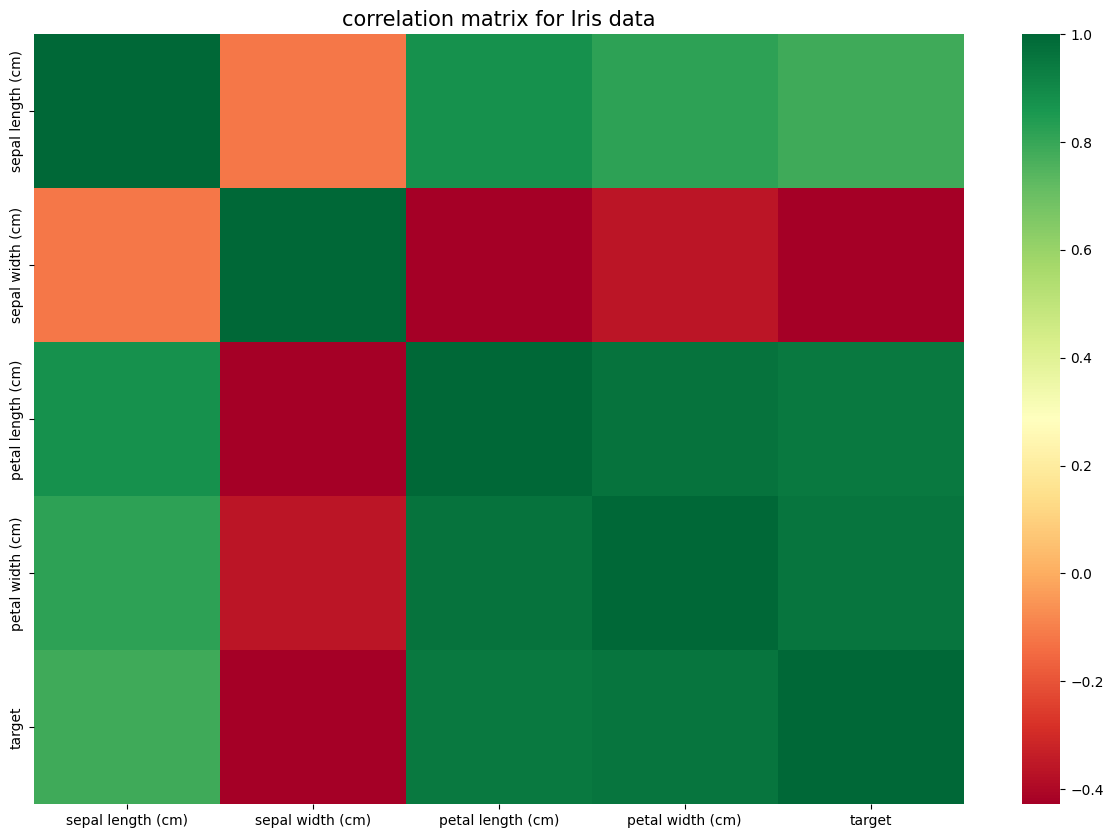

In [7]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap="RdYlGn")
plt.title("correlation matrix for Iris data", fontsize=15)
plt.show()

In [8]:
# Select columns with numerical data types
num = df.select_dtypes(exclude=['object']).columns
num

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Text(0.5, 1.0, 'correlation matrix for iris data')

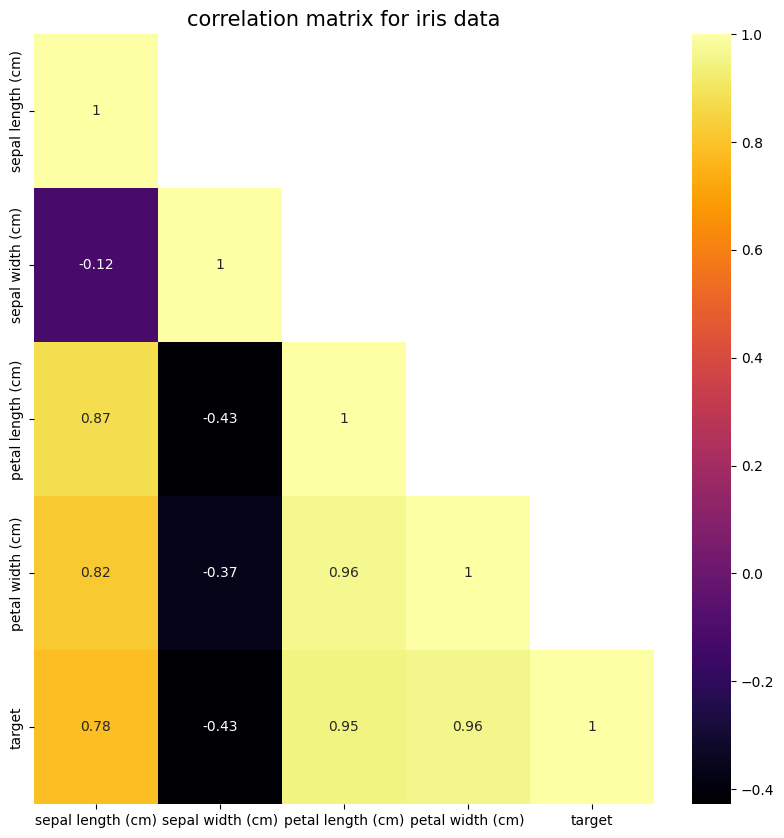

In [9]:
# Create a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(10, 10))
sns.heatmap(df[num].corr(), annot=True, cmap='inferno', mask=np.triu(df[num].corr(), k=1))
plt.title("correlation matrix for iris data", fontsize=15)

## Splitting the dataset into the Training set and Test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93, stratify=y, shuffle=True)

# Display the dimensions of the training and testing sets
print(f'Dimensions of the training features: {X_train.shape}')
print(f'Dimensions of the training target: {y_train.shape}')
print(f'Dimensions of the testing features: {X_test.shape}')
print(f'Dimensions of the testing target: {y_test.shape}')

Dimensions of the training features: (120, 4)
Dimensions of the training target: (120,)
Dimensions of the testing features: (30, 4)
Dimensions of the testing target: (30,)


# Part 2

## MLP

In [11]:
model_1 = MLPClassifier(hidden_layer_sizes=(9,18,9), max_iter=800, random_state=93, verbose = False)
model_1.fit(X_train, y_train)
model_1.score(X_test, y_test)

0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



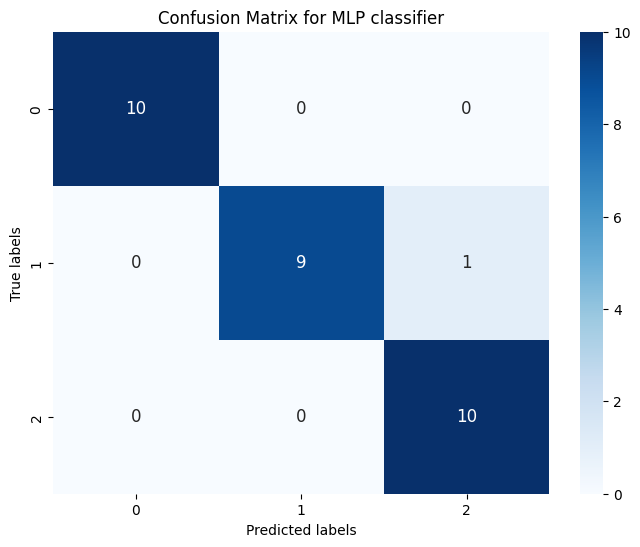

In [14]:
# Making predictions on the test set
y_pred_1 = model_1.predict(X_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_1)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix for MLP classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



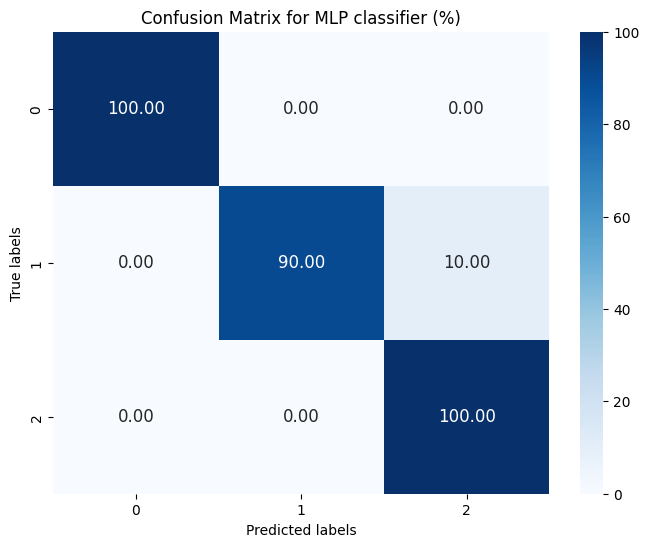

In [15]:
# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix for MLP classifier (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

## Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



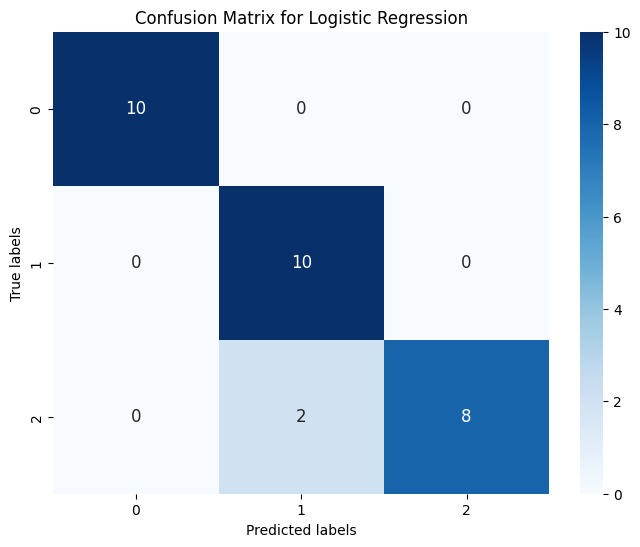

In [16]:
model_2 = LogisticRegression(max_iter=200, random_state=93)

model_2.fit(X_train, y_train)

# Making predictions on the test set
y_pred_2 = model_2.predict(X_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_2)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



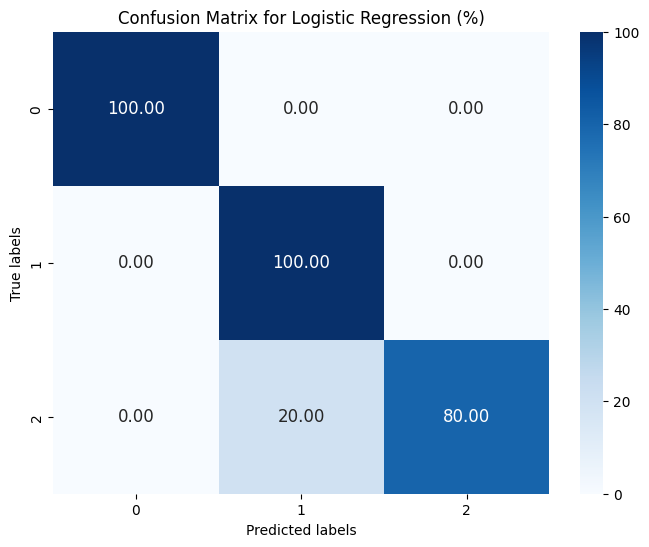

In [17]:
# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix for Logistic Regression (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

## RBF

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



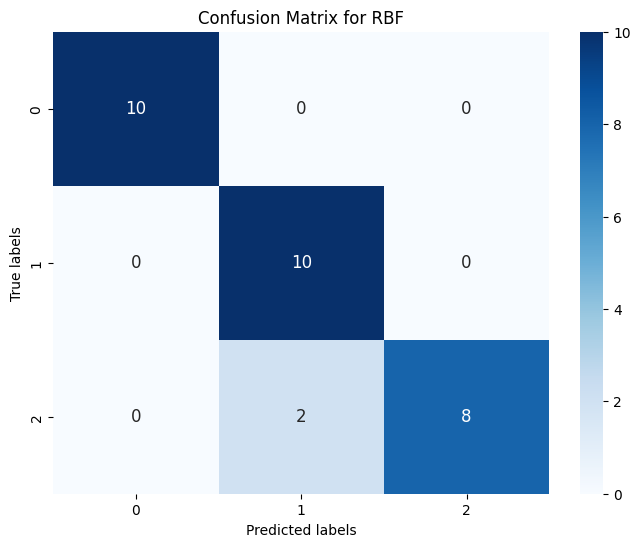

In [18]:
# Assuming you've trained your model already
model_3 = SVC(kernel='rbf', random_state=93)
model_3.fit(X_train, y_train)

# Making predictions on the test set
y_pred_3 = model_3.predict(X_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_3)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix for RBF')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_3))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



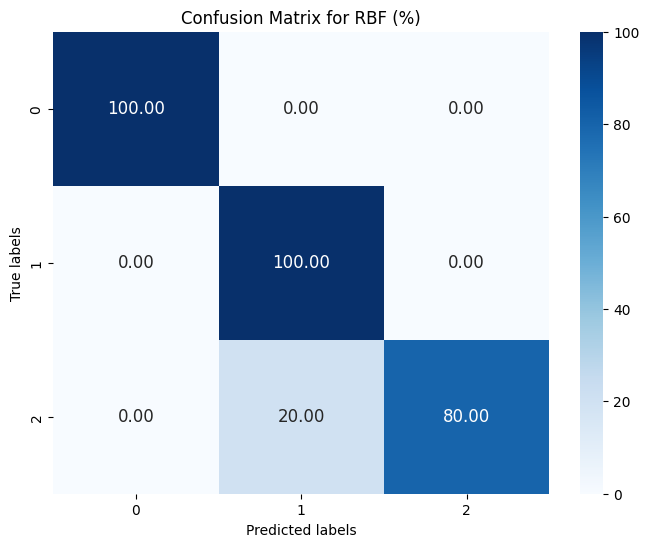

In [19]:
# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix for RBF (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_3))

## Without using library

### Activation Function

In [ ]:
def linear(x):
    return x

In [ ]:
def relu(x):
    return np.maximum(0, x)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def tanh(x):
    return np.tanh(x)

### Loss

In [ ]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [ ]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

### Accuracy

In [ ]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

### MLP

In [ ]:
class MLP:

    def __init__(self, hidden_layer_sizes, hidden_activation='relu',
                 output_size=1, output_activation='sigmoid',
                 n_iter=1000, loss_fn=bce, eta=0.1):

        self.hidden_layer_sizes = hidden_layer_sizes  # List of hidden layer sizes
        self.hidden_activation = hidden_activation  # Activation function for hidden layers
        self.output_size = output_size  # Output layer size
        self.output_activation = output_activation  # Activation function for output layer
        self.n_iter = n_iter  # Number of iterations for training
        self.loss_fn = loss_fn  # Loss function for training
        self.eta = eta  # Learning rate

    def _init_weights(self):
        self.ws, self.bs = [], []  # Weight and bias lists for each layer
        all_layers = [self.input_size] + self.hidden_layer_sizes + [self.output_size]  # All layer sizes
        num_layers = len(all_layers)
        for i in range(1, num_layers):
            w = np.random.randn(all_layers[i-1], all_layers[i])  # Randomly initialize weights
            b = np.random.randn(all_layers[i])  # Randomly initialize biases
            self.ws.append(w)
            self.bs.append(b)

    def fit(self, X, y):
        n, self.input_size = X.shape  # Number of samples and input size
        self._init_weights()
        for _ in range(self.n_iter):
            y_hat = self.predict(X)  # Make predictions
            loss = self.loss_fn(y, y_hat)  # Compute loss
            self._gradient_descent(X, y, y_hat)  # Update weights and biases
            print(loss)  # Print loss

    def _gradient_descent(self, X, y, y_hat):
        delta = y_hat - y  # Compute difference between predicted and true values
        for j in range(len(self.ws)-1, 0, -1):
            w_grad = (self.as_[j-1].T @ delta) / len(y)  # Compute weight gradient
            b_grad = delta.mean(0)  # Compute bias gradient
            self.ws[j] -= self.eta * w_grad  # Update weights
            self.bs[j] -= self.eta * b_grad  # Update biases
            delta = (delta @ self.ws[j].T) * (self._activation_derivative(self.hs[j-1], self.hidden_activation))

    def predict(self, X):
        self.hs = []  # Hidden layer outputs
        self.as_ = []  # Activation function outputs
        for i, (w, b) in enumerate(zip(self.ws[:-1], self.bs[:-1])):
            a = self.as_[i-1].copy() if i>0 else X.copy()  # Input to the hidden layer
            self.hs.append(a @ w + b)  # Compute hidden layer output
            self.as_.append(self._activation_function(self.hs[i], self.hidden_activation))  # Apply activation function
        y = self._activation_function(self.as_[-1] @ self.ws[-1] + self.bs[-1], self.output_activation)  # Output layer activation
        return y

    def _activation_function(self, x, activation):
        if activation == 'relu':
            return np.maximum(0, x)  # ReLU activation
        elif activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))  # Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")

    def _activation_derivative(self, x, activation):
        if activation == 'relu':
            return np.where(x > 0, 1, 0)  # Derivative of ReLU activation
        elif activation == 'sigmoid':
            sigmoid = self._activation_function(x, 'sigmoid')
            return sigmoid * (1 - sigmoid)  # Derivative of Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")


In [ ]:
# Convert target labels to one-hot encoding for MLP
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((len(labels), num_classes))
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot

### Logistic Regression

In [ ]:
class Logistic_regression:

    def __init__(self, in_features, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = sigmoid
        self.loss_fn = bce
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            #model
            y_hat = self.predict(x)
            #loss
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            #grad
            self.gradient(x, y, y_hat)
            #optimize
            self.gradient_descent()
            #print results
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

### RBF

In [ ]:
class RBF:
    def __init__(self, num_centers, learning_rate=0.01, epochs=1000):
        self.num_centers = num_centers
        self.learning_rate = learning_rate
        self.epochs = epochs

    def gaussian_rbf(self, x, c, sigma):
        return np.exp(-np.linalg.norm(x - c) / (2 * sigma**2))

    def train(self, X, y):
        self.centers = X[np.random.choice(X.shape[0], self.num_centers, replace=False)]
        self.sigma = np.std(X)

        self.weights = np.random.rand(self.num_centers)

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                phi = np.array([self.gaussian_rbf(X[i], c, self.sigma) for c in self.centers])
                prediction = np.dot(phi, self.weights)
                error = y[i] - prediction

                # Update weights
                self.weights += self.learning_rate * error * phi

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            phi = np.array([self.gaussian_rbf(X[i], c, self.sigma) for c in self.centers])
            prediction = np.dot(phi, self.weights)
            predictions.append(prediction)

        return predictions